# Pridictive Analysis of Spam/Ham mail on Spam Dataset with Natural Language Processing(NLP)

### About Dataset
#### # The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research.It contains one set of SMS messages in English of 5,572 messages, tagged acording being ham (legitimate) or spam.



#### - Here we are going to Load and Analyse the dataset
#### - Clean the Dataset from Null values and Irrelevant Columns if any existed
#### - Process the Textual column with Natural Language Processing (NLP) to fit the ML Model
#### - Split the Data into Train test split
#### - As this data is a Classification Type - Logical regression Algorithm will be used
#### - Check the accuracy for the Model

### Importing Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [2]:
data = pd.read_csv("spam.csv", encoding = 'cp1252')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
#Find the shape of the Data
print("SHAPE: ",data.shape)

SHAPE:  (5572, 5)


### Checking for any missing values

In [4]:
print((data.isnull().sum()) / len(data) * 100)

v1             0.000000
v2             0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64


### - As the Unnamed: 2, Unnamed: 3, Unnamed: 4 Columns are having more than 30% Null Values
### - Dropping those columns from the dataset

In [5]:
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Renaming the remaining columns with Proper names

In [6]:
data = data.rename({'v1' : 'Type', 'v2' : 'Message'}, axis = 1)
data.head()

,Type,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Re-arrange the columns of the Dataset

In [7]:
data = data[['Message', 'Type']]
data.head()

,Message,Type
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


### Visualizing the Number of messages on Spam/Ham respectively

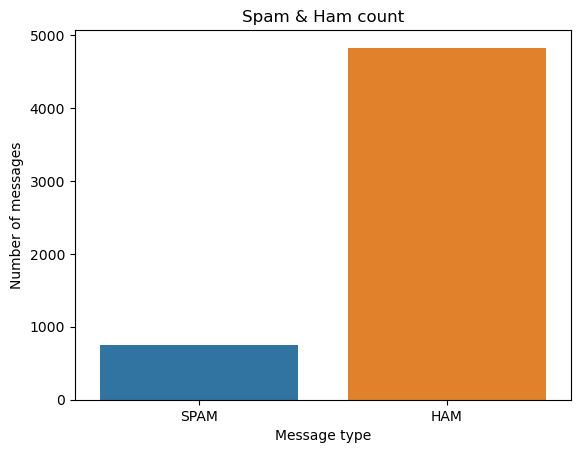

In [8]:
msg_cnts = [data[data['Type']=='spam'].shape[0],data[data['Type']=='ham'].shape[0]]
x_label=['SPAM','HAM']
sns.barplot(x=x_label, y=msg_cnts)
plt.title("Spam & Ham count")
plt.xlabel("Message type")
plt.ylabel("Number of messages")
plt.show()

### Replacing (Spam & Ham) with (0 & 1)

In [9]:
data['Type'] = data['Type'].replace('spam', 0)
data['Type'] = data['Type'].replace('ham', 1)
data.head()

,Message,Type
0,"Go until jurong point, crazy.. Available only ...",1
1,Ok lar... Joking wif u oni...,1
2,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,U dun say so early hor... U c already then say...,1
4,"Nah I don't think he goes to usf, he lives aro...",1


### Converting all upper case text to lower case text

In [10]:
data['Message'] = data['Message'].str.lower()
data.head()

,Message,Type
0,"go until jurong point, crazy.. available only ...",1
1,ok lar... joking wif u oni...,1
2,free entry in 2 a wkly comp to win fa cup fina...,0
3,u dun say so early hor... u c already then say...,1
4,"nah i don't think he goes to usf, he lives aro...",1


### Removing all the punctuations from the Textual Data column

In [11]:
import string
eng_punct = string.punctuation

def remove_punc(text):
    translator = str.maketrans('', '', eng_punct)
    return text.translate(translator)

data['Message'] = data['Message'].apply(lambda x : remove_punc(x))
data.head()

,Message,Type
0,go until jurong point crazy available only in ...,1
1,ok lar joking wif u oni,1
2,free entry in 2 a wkly comp to win fa cup fina...,0
3,u dun say so early hor u c already then say,1
4,nah i dont think he goes to usf he lives aroun...,1


### Removing stop words from the text columns

In [12]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop_words])

data['Message'] = data['Message'].apply(remove_stopwords)
data.head()

,Message,Type
0,go jurong point crazy available bugis n great ...,1
1,ok lar joking wif u oni,1
2,free entry 2 wkly comp win fa cup final tkts 2...,0
3,u dun say early hor u c already say,1
4,nah dont think goes usf lives around though,1


## Removing Numbers from the text columns


In [13]:
import re
def remove_nums(text):
    return re.sub('[0-9]+', "", text)

data['Message'] = data['Message'].apply(lambda x : remove_nums(x))
data.head()

,Message,Type
0,go jurong point crazy available bugis n great ...,1
1,ok lar joking wif u oni,1
2,free entry wkly comp win fa cup final tkts st...,0
3,u dun say early hor u c already say,1
4,nah dont think goes usf lives around though,1


### Stemming on the Text Columns


In [14]:
from nltk.stem import PorterStemmer
pst = PorterStemmer()

def stemming_on_text(data):
    text = [pst.stem(data) for word in data]
    return data

data['Message'] = data['Message'].apply(lambda x : stemming_on_text(x))
data.head()

,Message,Type
0,go jurong point crazy available bugis n great ...,1
1,ok lar joking wif u oni,1
2,free entry wkly comp win fa cup final tkts st...,0
3,u dun say early hor u c already say,1
4,nah dont think goes usf lives around though,1


### Lemmatization on Text columns


In [15]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

def lemmatizer_on_text(data):
    text = [wnl.lemmatize(word) for word in data]
    return data

data['Message'] = data['Message'].apply(lambda x : lemmatizer_on_text(x))
data.head()

,Message,Type
0,go jurong point crazy available bugis n great ...,1
1,ok lar joking wif u oni,1
2,free entry wkly comp win fa cup final tkts st...,0
3,u dun say early hor u c already say,1
4,nah dont think goes usf lives around though,1


### Spliting the data into training and testing sets


In [16]:
from sklearn.model_selection import train_test_split
X = data.drop('Type', axis=1)
y = data['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Message
1978,im boat still moms check yo im half naked
3989,bank granite issues strongbuy explosive pick m...
3935,r giving second chance rahul dengra
4078,played smash bros ltgt religiously
4086,private account statement shows unredeemed ...
...,...
3772,came hostel going sleep plz call class hrishi
5191,sorry ill call later
5226,prabhaim sorydarealyfrm heart im sory
5390,nt joking seriously told


### CountVectorizing on the Text Columns


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv

cv.fit(X_train['Message'])

X_train = cv.transform(X_train['Message'])
X_test = cv.transform(X_test['Message'])
X_train


<4457x7466 sparse matrix of type '<class 'numpy.int64'>'
	with 36367 stored elements in Compressed Sparse Row format>

### Building and training the model on Logical Regression


In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

### Evaluate the model

In [19]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9766816143497757


## The Machine Learning Model Predicts the dataset with 97% of accuracy